Global Power Plant Database


Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [35]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing the necessary Algorithms
from sklearn import linear_model

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split

In [37]:
#Loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [38]:
#printing the dataset
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#checking the shape of dataset
df.shape

(907, 27)

In [40]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Here we can see there are many irrelevant columns. We will have to manipulate the dataset by removing them. 

In [41]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see there a several null values. We will try to handle them. 

In [42]:
df['plant_name(country)']=df[['name','country']].apply(lambda x: x['name']+'('+x['country']+')',axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,plant_name(country)
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACME Solar Tower(IND)
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADITYA CEMENT WORKS(IND)
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AES Saurashtra Windfarms(IND)
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,AGARTALA GT(IND)
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,AKALTARA TPP(IND)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,YERMARUS TPP(IND)
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yelesandra Solar Power Plant(IND)
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yelisirur wind power project(IND)
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZAWAR MINES(IND)


In the above we will merge the name of the plant with the country in a new column plant_name(country) and then consider dropping the columns name and country. 

Let's drop the unnecessary columns.

In [43]:
df.drop(['other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis = 1, inplace = True)
df.drop(['country','name','country_long','gppd_idnr','latitude','longitude','url'], axis = 1, inplace = True)

In [44]:
df.drop(['wepp_id'], axis = 1, inplace = True)

In [45]:
df.head(5)

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,plant_name(country)
0,2.5,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACME Solar Tower(IND)
1,98.0,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADITYA CEMENT WORKS(IND)
2,39.2,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AES Saurashtra Windfarms(IND)
3,135.0,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority,AGARTALA GT(IND)
4,1800.0,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority,AKALTARA TPP(IND)


In [46]:
df.shape

(907, 15)

In [47]:
df.isnull().sum()

capacity_mw                 0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
plant_name(country)         0
dtype: int64

Now, let us fill the missing columns and also create a new dataframe with our target columns

In [49]:
df=df.fillna('N')
data1=df[['plant_name(country)', 'capacity_mw', 'primary_fuel',]]
data1[0:5]

,plant_name(country),capacity_mw,primary_fuel
0,ACME Solar Tower(IND),2.5,Solar
1,ADITYA CEMENT WORKS(IND),98.0,Coal
2,AES Saurashtra Windfarms(IND),39.2,Wind
3,AGARTALA GT(IND),135.0,Gas
4,AKALTARA TPP(IND),1800.0,Coal


Let us visualize the relation between the primary_fuel and capacity_mw

<AxesSubplot:ylabel='primary_fuel'>

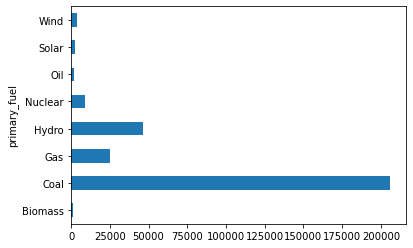

In [50]:
data1.groupby('primary_fuel')['capacity_mw'].sum().plot.barh()

We observe that coal is the major primary fuel in the country India followed by hydro power. Gas is the third highest used primary fuel, while Nuclear power plants, Wind, solar and oil have the least importance as a primary fuel.

Now let's find out the types of Power Plants based on primary Fuel used

Lets find out the approx age of the power plants 

In [51]:
df['commissioning_year'].value_counts()  #age of plants

N         380
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 74, dtype: int64

Well, a lot of powerplants donot have their date of Commission. The plants are as old as 1942 and the latest one belongs to the year 2012. As per out question, this column is not needed so we may drop it as well. 

In [52]:
df.drop(['commissioning_year'], axis = 1, inplace = True)

<AxesSubplot:xlabel='plant_name(country)'>

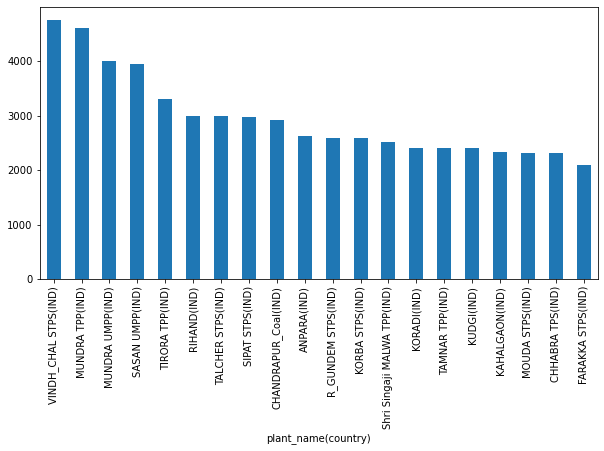

In [53]:
df.groupby('plant_name(country)')['capacity_mw'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(10,5))

The above plot gives us am idea of the different plots and their distribution in the country. 

In the new dataframe lets find out the total capacity_mw or the total installed capacity. 

In [54]:
# Total capacity of all the plants
total_capacity_mw = data1['capacity_mw'].sum()
print('Total Installed Capacity: '+'{:.2f}'.format(total_capacity_mw) + ' MW')

Total Installed Capacity: 295884.95 MW


Now, lets calculate the percentage total of the capacity.

In [55]:
capacity = (data1.groupby(['primary_fuel'])['capacity_mw'].sum()).to_frame()
capacity = capacity.sort_values('capacity_mw',ascending=False)
capacity['percentage_of_total'] = (capacity['capacity_mw']/total_capacity_mw)*100
capacity

,capacity_mw,percentage_of_total
primary_fuel,,
Coal,205839.220,69.567318
Hydro,46441.770,15.695888
Gas,25172.506,8.507532
Nuclear,8780.000,2.967370
Wind,4111.850,1.389679
Solar,2757.500,0.931950
Oil,1778.840,0.601193
Biomass,1003.260,0.339071


In [56]:
df.isnull().sum()

capacity_mw               0
primary_fuel              0
other_fuel1               0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
plant_name(country)       0
dtype: int64

Now the dataset looks clean. We may proceeed with Model building.

Lets get the data ready by applying LabelEncoder

In [57]:
data1

,plant_name(country),capacity_mw,primary_fuel
0,ACME Solar Tower(IND),2.5,Solar
1,ADITYA CEMENT WORKS(IND),98.0,Coal
2,AES Saurashtra Windfarms(IND),39.2,Wind
3,AGARTALA GT(IND),135.0,Gas
4,AKALTARA TPP(IND),1800.0,Coal
...,...,...,...
902,YERMARUS TPP(IND),1600.0,Coal
903,Yelesandra Solar Power Plant(IND),3.0,Solar
904,Yelisirur wind power project(IND),25.5,Wind
905,ZAWAR MINES(IND),80.0,Coal


In [95]:
label_encoder = LabelEncoder()

df['plant_name(country)'] = label_encoder.fit_transform(data1['plant_name(country)'])

In [96]:
df['primary_fuel'] = label_encoder.fit_transform(data1['primary_fuel'])

In [97]:
df

,capacity_mw,primary_fuel,other_fuel1,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,plant_name(country)
0,2.5,6,N,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,N,N,N,N,N,N,N,0
1,98.0,1,N,Ultratech Cement ltd,Ultratech Cement ltd,WRI,N,N,N,N,N,N,N,1
2,39.2,7,N,AES,CDM,WRI,N,N,N,N,N,N,N,2
3,135.0,2,N,N,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,Central Electricity Authority,3
4,1800.0,1,Oil,N,Central Electricity Authority,WRI,2019.0,3035.55,5916.37,6243.0,5385.579736,7279.0,Central Electricity Authority,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,1,Oil,N,Central Electricity Authority,WRI,2019.0,N,0.994875,233.59665,865.4,686.5,Central Electricity Authority,902
903,3.0,6,N,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,N,N,N,N,N,N,N,903
904,25.5,7,N,N,CDM,WRI,N,N,N,N,N,N,N,904
905,80.0,1,N,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,N,N,N,N,N,N,N,905


In [104]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [105]:
y=data1['plant_name(country)'].copy()
x=data1.drop('plant_name(country)',axis=1).copy()

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [107]:
models=[
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(), 
    BaggingClassifier(), 
    GradientBoostingClassifier(), 
    RandomForestClassifier()
       ]

model_names=[
    "LogisticRegression",
    "SVC",
    "MLPClassifier",
    "DecisionTreeClassifier",
    "AdaBoostClassifier",
    "BaggingClassifier",
    "GradientBoostingClassifier",
    "RandomForestClassifier"
    ]


In [108]:
results = []

for i in range(len(models)):
    models[i].fit(x_train,y_train)
    results.append(models[i].score(x_test,y_test))

In [109]:
for i in range(len(models)):
    print(model_names[i] + ": {:.4f}".format(results[i])) 
   

LogisticRegression: 0.0000
SVC: 0.0000
MLPClassifier: 0.0000
DecisionTreeClassifier: 0.0000
AdaBoostClassifier: 0.0000
BaggingClassifier: 0.0000
GradientBoostingClassifier: 0.0000
RandomForestClassifier: 0.0000
